# Project: Wrangling and Analyze Data

### About Project:

In this project we will use the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. There are 3 stages of the data wrangling which consists of gathering, assessing and cleaning the data. This archive has basic tweeter data which has +5000 rows (tweet id's, timestamps, categories etc.)

The are some humorous ratings in this data; however, we will keep them and use it in the further stages.

At the end of this work you'll see some visualizations and insights related with the twitter archive data.

In [1]:
import requests
import os
import numpy as np
import pandas as pd
import datetime
import json
import time
import tweepy
import json
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering

***1. Downloading the twitter archieve data.***

In [2]:
#Direct download didn't work for online project submit so I downloaded 'twitter_archieve_enchanced.csv' by programmatically.
#Otherwise I could download directly and use this code df = pd.read_csv('twitter_archieve_enchanced.csv')

folder_name = 'twitter_archieve'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
response =requests.get(url)
print(response)
with open(os.path.join(folder_name,
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

<Response [200]>


In [3]:
#Checking the directories and downloaded items    
os.listdir(folder_name)

['twitter-archive-enhanced.csv', 'image-predictions.tsv', '.ipynb_checkpoints']

***2. Downloading the tweet image predictions.***

In [4]:
#URL of the file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# get file with the image predictions
with open('image-predictions.tsv' , 'wb') as file:
    predictions = requests.get(url)
    file.write(predictions.content)

***3. Using Tweepy library to query additional data via the Twitter API.***

In [5]:
"
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
"

SyntaxError: EOL while scanning string literal (<ipython-input-5-3ab8704953d8>, line 1)

In [6]:
t_list = []

for line in open('tweet_json.txt', 'r'):
    twitter_data = json.loads(line)
    t_list.append({'tweet_id': twitter_data['id_str'],'retweet_count': twitter_data['retweet_count'],
                   'favorite_count': twitter_data['favorite_count'],'followers_count': twitter_data['user']['followers_count']})

## Assessing Data
In this section, **eight (8) quality issues and two (2) tidiness issue** identified by using both ***visual assessment (excel)*** and programmatic assessement to assess the data.

***1.Creating data tables***

In [7]:
df = pd.read_csv('twitter_archieve/twitter-archive-enhanced.csv')

In [8]:
df_img = pd.read_csv('image-predictions.tsv', sep = '\t')

In [9]:
df_tweepy = pd.DataFrame(t_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

***2. Programmatic Assessment***

In [10]:
df_tweepy.head(10)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889
5,891087950875897856,3261,20562,3200889
6,890971913173991426,2158,12041,3200889
7,890729181411237888,16716,56848,3200889
8,890609185150312448,4429,28226,3200889
9,890240255349198849,7711,32467,3200889


In [11]:
df_tweepy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id           2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


*df_tweepy looks like a cleared and organized data however we might needd to change tweet_id to string in the next stages.*

In [12]:
df_img.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [13]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


*df_img which has the image predictions is also organized and cleared data.*

In [14]:
df.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


*There are many quality issues in the "twitter-archive-enhanced.csv" data; however, we'll focus on 8 quality and 2 tidyness issues in this project.*

In [17]:
print(df['text'][1068])
print(" ")
print(df['rating_numerator'][1068])

After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
 
9


### Quality issues
*1. "source" column contains html residues*

*2. There are multiple identical links in the "expanded_urls" column and some of them are missing.*

*3. We should drop 181 retweet rows.*

*4. The "timestamp" is present as an object, which is supposed to be converted into datetime to be exploitable.*

*5."tweet_id" currently present as an 'INT' should be converted to 'string' datatype.*

*6. There are some multiple dog categories in the same row. We should identify these rows.*

*7. Some values in rating_numerator and rating_denominator seem to be in error or suspicious outliers.*

*8. We should also change datatype of "tweet_id" in image predictions table.*

*The assessment stage completed by both visually (Excel) and proggrammatically (Jupyter Notebook).*

### Tidiness issues
*1. The variables doggo, floofer, pupper and puppo should be a part of a single column. Those represent one single variable according to the tidyness rule.*

*2. Twitter api table columns (retweet_count, favorite_count, followers_count) should be added to twitter archive table.*

## Cleaning Data

#### Creating a copy of original data

In [18]:
# Making a copy of original pieces of data

clean_archive = df.copy()

#### 1) Cleaning html residues on source coulmn

In [19]:
clean_archive['source'] = clean_archive['source'].map(lambda x: x.lstrip('<a href=').rstrip('</a>'))

In [20]:
clean_archive['source'].head()

0    "http://twitter.com/download/iphone" rel="nofo...
1    "http://twitter.com/download/iphone" rel="nofo...
2    "http://twitter.com/download/iphone" rel="nofo...
3    "http://twitter.com/download/iphone" rel="nofo...
4    "http://twitter.com/download/iphone" rel="nofo...
Name: source, dtype: object

#### 2) Double-Links error and generating URLs when missing

#### Code

In [21]:
for i in range(len(clean_archive)):
    tw_id = clean_archive['tweet_id'][i]
    url = 'https://twitter.com/dog_rates/status/{}'.format(tw_id)
    clean_archive['expanded_urls'].replace(clean_archive['expanded_urls'][i],url,inplace=True)

#### Test

In [22]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2356 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

#### 3) Dropping retweet rows and unnecessary columns

#### Code

In [23]:
clean_archive = clean_archive[clean_archive['retweeted_status_id'].isnull()]
clean_archive.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','in_reply_to_status_id','in_reply_to_user_id',], axis=1, inplace = True)

#### Test

In [24]:
clean_archive.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### 4) Changing the Data-type of ''timestamp'' column to 'datetime'

#### Code

In [25]:
clean_archive['timestamp'] = pd.to_datetime(clean_archive['timestamp'])

#### Test

In [26]:
clean_archive.info()
print(" ")
print(clean_archive.timestamp.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 220.9+ KB
 
0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
Name: timestamp, dtype: datetime64[ns]


#### 5) Changing the datatype of "tweet_id" column to string

#### Code

In [27]:
clean_archive['tweet_id'] = clean_archive['tweet_id'].astype(str)

#### Test

In [28]:
clean_archive.info()
print(" ")
print(clean_archive.tweet_id.head(2))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB
 
0    892420643555336193
1    892177421306343426
Name: tweet_id, dtype: object


#### 6) Combining dog development stages into one column

#### Code

In [29]:
clean_archive['combined_stages'] = clean_archive.doggo + clean_archive.floofer + clean_archive.pupper + clean_archive.puppo

In [30]:
clean_archive.combined_stages.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: combined_stages, dtype: int64

In [31]:
def stage_control(data):
    if data['combined_stages'].count('None') == 2:
        return 'Multiple'
    else:
        if data['combined_stages'].count('doggo') == 1:
            return 'Doggo'
        elif data['combined_stages'].count('floofer') == 1:
            return 'Floofer'
        elif data['combined_stages'].count('pupper') == 1:
            return 'Pupper'
        elif data['combined_stages'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

clean_archive['combined_stages'] = clean_archive.apply(stage_control, axis=1)

In [32]:
clean_archive = clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Test

In [33]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
combined_stages       2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 169.9+ KB


In [34]:
clean_archive.combined_stages.head(50)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9       Doggo
10       None
11       None
12      Puppo
13       None
14      Puppo
15       None
16       None
17       None
18       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29     Pupper
30       None
31       None
33       None
34       None
35       None
37       None
38       None
39       None
40       None
41       None
42       None
43      Doggo
44       None
45       None
46    Floofer
47       None
48       None
49     Pupper
50       None
51       None
52       None
Name: combined_stages, dtype: object

#### 7) Drop rows with multiple dog stages

#### Code

In [35]:
clean_archive = clean_archive[clean_archive.combined_stages != 'Multiple']

#### Test

In [36]:
clean_archive.combined_stages.value_counts()

None       1831
Pupper      224
Doggo        75
Puppo        24
Floofer       9
Name: combined_stages, dtype: int64

#### 8) Some columns were not extracted properly to capture decimals

In [37]:
with pd.option_context('max_colwidth', 200):
    display(df[df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


#### Code

In [38]:
clean_archive[['rating_numerator', 'rating_denominator']] = clean_archive[['rating_numerator','rating_denominator']].astype(float)

In [39]:
clean_archive.loc[(clean_archive.tweet_id == "883482846933004288"), 'rating_numerator'] = 13.5
clean_archive.loc[(clean_archive.tweet_id == "832215909146226688"), 'rating_numerator'] = 9.75
clean_archive.loc[(clean_archive.tweet_id == "786709082849828864"), 'rating_numerator'] = 9.75
clean_archive.loc[(clean_archive.tweet_id == "778027034220126208"), 'rating_numerator'] = 11.27
clean_archive.loc[(clean_archive.tweet_id == "681340665377193984"), 'rating_numerator'] = 9.5
clean_archive.loc[(clean_archive.tweet_id == "680494726643068929"), 'rating_numerator'] = 11.26

#### Test

In [40]:
with pd.option_context('max_colwidth', 200):
    display(clean_archive[clean_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",13.50,10.0
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",9.75,10.0
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,11.27,10.0
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10.0
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,11.26,10.0


#### 9) Before that we start to merge we should also change datatype of "tweet_id" in image predictions table

#### Code

In [41]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [42]:
df_img['tweet_id'] = df_img['tweet_id'].astype(str)

#### Test

In [43]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 10) Merge twitter api table and image prediction table to twitter archive table

#### Code

In [44]:
clean_archive = pd.merge(left=clean_archive, right=df_tweepy, how='left', on='tweet_id')
clean_archive = pd.merge(left=clean_archive, right=df_img, how='left', on='tweet_id')

#### Test

In [45]:
clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 0 to 2162
Data columns (total 23 columns):
tweet_id              2163 non-null object
timestamp             2163 non-null datetime64[ns]
source                2163 non-null object
text                  2163 non-null object
expanded_urls         2163 non-null object
rating_numerator      2163 non-null float64
rating_denominator    2163 non-null float64
name                  2163 non-null object
combined_stages       2163 non-null object
retweet_count         2163 non-null int64
favorite_count        2163 non-null int64
followers_count       2163 non-null int64
jpg_url               1983 non-null object
img_num               1983 non-null float64
p1                    1983 non-null object
p1_conf               1983 non-null float64
p1_dog                1983 non-null object
p2                    1983 non-null object
p2_conf               1983 non-null float64
p2_dog                1983 non-null object
p3                    1

In [46]:
clean_archive.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,combined_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,8853,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,6514,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,4328,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,8964,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"""http://twitter.com/download/iphone"" rel=""nofo...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,9774,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [47]:
#I'm checking these before I save my csv file because when I try to define it
#as a twitter_archive_master dataframe datatypes will be lost.
#tweet_id -> string

clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 0 to 2162
Data columns (total 23 columns):
tweet_id              2163 non-null object
timestamp             2163 non-null datetime64[ns]
source                2163 non-null object
text                  2163 non-null object
expanded_urls         2163 non-null object
rating_numerator      2163 non-null float64
rating_denominator    2163 non-null float64
name                  2163 non-null object
combined_stages       2163 non-null object
retweet_count         2163 non-null int64
favorite_count        2163 non-null int64
followers_count       2163 non-null int64
jpg_url               1983 non-null object
img_num               1983 non-null float64
p1                    1983 non-null object
p1_conf               1983 non-null float64
p1_dog                1983 non-null object
p2                    1983 non-null object
p2_conf               1983 non-null float64
p2_dog                1983 non-null object
p3                    1

In [48]:
clean_archive.to_csv('twitter_archive_master.csv', index=False)

In [49]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [50]:
# For example tweet_id turned into int64, timestamp turned into object

twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 23 columns):
tweet_id              2163 non-null int64
timestamp             2163 non-null object
source                2163 non-null object
text                  2163 non-null object
expanded_urls         2163 non-null object
rating_numerator      2163 non-null float64
rating_denominator    2163 non-null float64
name                  2163 non-null object
combined_stages       2163 non-null object
retweet_count         2163 non-null int64
favorite_count        2163 non-null int64
followers_count       2163 non-null int64
jpg_url               1983 non-null object
img_num               1983 non-null float64
p1                    1983 non-null object
p1_conf               1983 non-null float64
p1_dog                1983 non-null object
p2                    1983 non-null object
p2_conf               1983 non-null float64
p2_dog                1983 non-null object
p3                    1983 non-n

In [62]:
#When u save your master data as csv some of your datatypes lost. 
#To correct this we have to add this cleaning part to here again.
#This cleaning must be done in this stage of the project.
#You can follow steps in the storing data section and read the comments.

twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)
twitter_archive_master.source = twitter_archive_master.source.astype("category")
twitter_archive_master.combined_stages = twitter_archive_master.combined_stages.astype("category")

In [52]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 23 columns):
tweet_id              2163 non-null object
timestamp             2163 non-null datetime64[ns]
source                2163 non-null category
text                  2163 non-null object
expanded_urls         2163 non-null object
rating_numerator      2163 non-null float64
rating_denominator    2163 non-null float64
name                  2163 non-null object
combined_stages       2163 non-null category
retweet_count         2163 non-null int64
favorite_count        2163 non-null int64
followers_count       2163 non-null int64
jpg_url               1983 non-null object
img_num               1983 non-null float64
p1                    1983 non-null object
p1_conf               1983 non-null float64
p1_dog                1983 non-null object
p2                    1983 non-null object
p2_conf               1983 non-null float64
p2_dog                1983 non-null object
p3                 

In [53]:
twitter_archive_master.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'combined_stages',
       'retweet_count', 'favorite_count', 'followers_count', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog'],
      dtype='object')

## Analyzing and Visualizing Data

### Insights:
1. Highest retweeted post is a video of a labrador retriever (doggo) standing in the pool.

In [54]:
twitter_archive_master.retweet_count.max()

79515

In [55]:
twitter_archive_master.query('retweet_count == 79515')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,combined_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
852,744234799360020481,2016-06-18 18:26:18,"""http://twitter.com/download/iphone"" rel=""nofo...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,None,Doggo,79515,...,1.0,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


In [56]:
twitter_archive_master.expanded_urls[852]

'https://twitter.com/dog_rates/status/744234799360020481'

#### Highest retweeted post is the video that linked below.

In [57]:
class Tweet(object):
    def __init__(self, s, embed_str=False):
        if not embed_str:
            api = 'https://publish.twitter.com/oembed?url={}'.format(s)
            response = requests.get(api)
            self.text = response.json()["html"]
        else:
            self.text = s

    def _repr_html_(self):
        return self.text

Tweet("https://twitter.com/dog_rates/status/744234799360020481")

2. A graph that shows the WeRateDogs retweet count over time.

It can be seen that the highest retweeted post which we identified above was between 2016-06 / 2016-07 period.


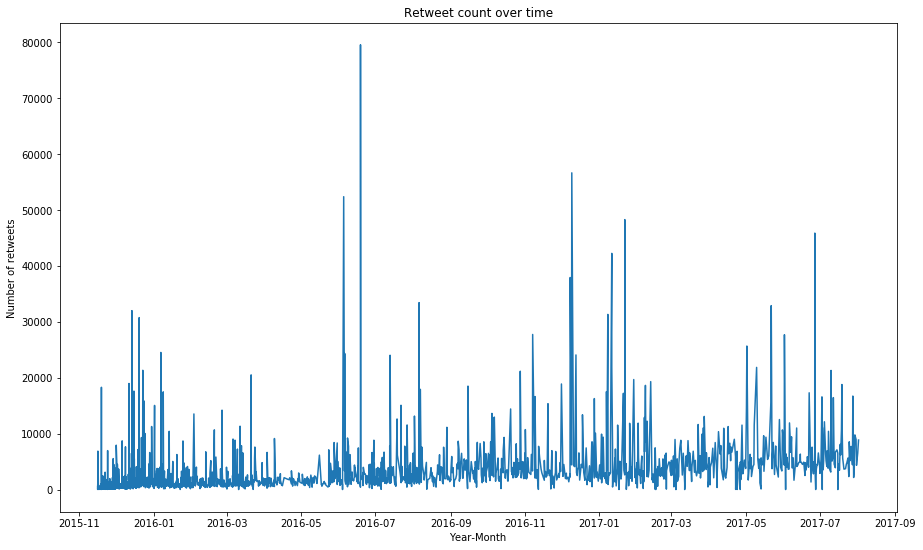

In [58]:
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(twitter_archive_master.timestamp, twitter_archive_master.retweet_count)
plt.title('Retweet count over time')
plt.xlabel('Year-Month')
plt.ylabel('Number of retweets');
plt.savefig('Retweetcountovertime.png')

2. The correlation between "retweet_count" and "favorite_count" presented below. 

There is a positive correlation. While the retweet count is increasing, the favorite count also increases.

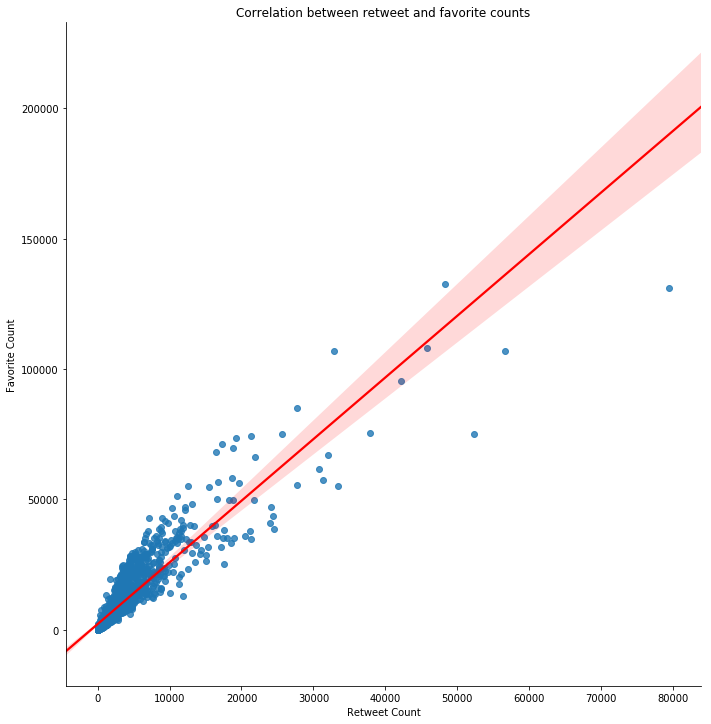

In [59]:
sns.lmplot(data = twitter_archive_master, x='retweet_count', y='favorite_count', size=10, line_kws={'color': 'red'});
plt.title('Correlation between retweet and favorite counts')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count')
plt.savefig('Correlation.png');

In [60]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count,followers_count,img_num,p1_conf,p2_conf,p3_conf
count,2163.000000,2163.000000,2163.000000,2163.000000,2.163000e+03,1983.000000,1983.000000,1.983000e+03,1.983000e+03
mean,13.187832,10.495608,2744.466482,8708.652797,3.200945e+06,1.203732,0.593112,1.346413e-01,6.034123e-02
std,47.836837,7.038440,4634.749795,12029.782109,4.419332e+01,0.561861,0.271886,1.007247e-01,5.089379e-02
min,0.000000,0.000000,0.000000,52.000000,3.200799e+06,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,606.500000,1892.500000,3.200901e+06,1.000000,0.362716,5.417505e-02,1.624950e-02
50%,11.000000,10.000000,1335.000000,4015.000000,3.200947e+06,1.000000,0.587342,1.176080e-01,4.965610e-02
75%,12.000000,10.000000,3217.000000,11095.000000,3.201001e+06,1.000000,0.843635,1.953115e-01,9.158675e-02
max,1776.000000,170.000000,79515.000000,132810.000000,3.201018e+06,4.000000,1.000000,4.880140e-01,2.734190e-01


It can be also seen that retweet count concentrated on 2,7k and favorite count is around 8,7k.